# Exercises:
Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

**Note: When resampling data, use a mean() aggregation method.**

### Store Item Demand
Load your store item demand data using your acquire and/or prepare functions.

1. Using a human-based approach, split your dataset into train and test sets.
2. Visualize your train-test split.



In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import acquire
import prepare

plt.rcParams['figure.figsize'] = [16,10]

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = acquire.main()
df.head(2)

next_page is: https://api.data.codeup.com/api/v1/sales?page=2
next_page is: https://api.data.codeup.com/api/v1/sales?page=3
next_page is: https://api.data.codeup.com/api/v1/sales?page=4
next_page is: https://api.data.codeup.com/api/v1/sales?page=5
next_page is: https://api.data.codeup.com/api/v1/sales?page=6
next_page is: https://api.data.codeup.com/api/v1/sales?page=7
next_page is: https://api.data.codeup.com/api/v1/sales?page=8
next_page is: https://api.data.codeup.com/api/v1/sales?page=9
next_page is: https://api.data.codeup.com/api/v1/sales?page=10
next_page is: https://api.data.codeup.com/api/v1/sales?page=11
next_page is: https://api.data.codeup.com/api/v1/sales?page=12
next_page is: https://api.data.codeup.com/api/v1/sales?page=13
next_page is: https://api.data.codeup.com/api/v1/sales?page=14
next_page is: https://api.data.codeup.com/api/v1/sales?page=15
next_page is: https://api.data.codeup.com/api/v1/sales?page=16
next_page is: https://api.data.codeup.com/api/v1/sales?page=17


next_page is: https://api.data.codeup.com/api/v1/sales?page=132
next_page is: https://api.data.codeup.com/api/v1/sales?page=133
next_page is: https://api.data.codeup.com/api/v1/sales?page=134
next_page is: https://api.data.codeup.com/api/v1/sales?page=135
next_page is: https://api.data.codeup.com/api/v1/sales?page=136
next_page is: https://api.data.codeup.com/api/v1/sales?page=137
next_page is: https://api.data.codeup.com/api/v1/sales?page=138
next_page is: https://api.data.codeup.com/api/v1/sales?page=139
next_page is: https://api.data.codeup.com/api/v1/sales?page=140
next_page is: https://api.data.codeup.com/api/v1/sales?page=141
next_page is: https://api.data.codeup.com/api/v1/sales?page=142
next_page is: https://api.data.codeup.com/api/v1/sales?page=143
next_page is: https://api.data.codeup.com/api/v1/sales?page=144
next_page is: https://api.data.codeup.com/api/v1/sales?page=145
next_page is: https://api.data.codeup.com/api/v1/sales?page=146
next_page is: https://api.data.codeup.co

,item_brand,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_date,sale_id,store_address,store_city,store_state,store_zipcode
1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [3]:
df = prepare.sales_date_index(df)
df = prepare.sales_new_columns(df)
df.head(2)

,item_brand,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01 Jan,2 Tue,10.92
2013-01-01 00:00:00+00:00,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,26.0,295813,2118 Fredericksburg Rdj,San Antonio,TX,78201,01 Jan,2 Tue,30.16


<AxesSubplot:xlabel='sale_date', ylabel='sales_total'>

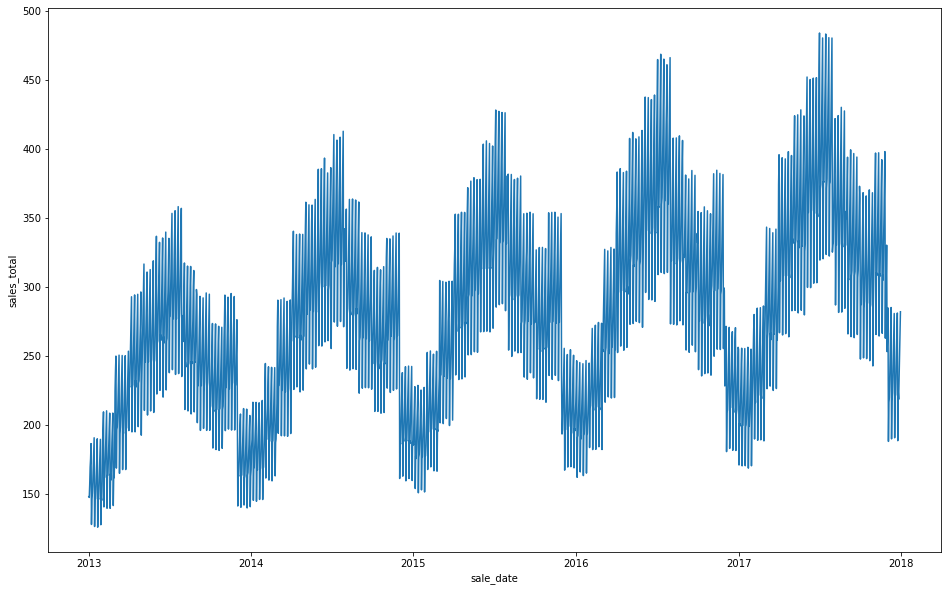

In [4]:
by_date = df.groupby('sale_date').mean()
sns.lineplot(data = by_date, x = 'sale_date', y = 'sales_total')

In [5]:
train = by_date[:'2016']
test = by_date['2017':]

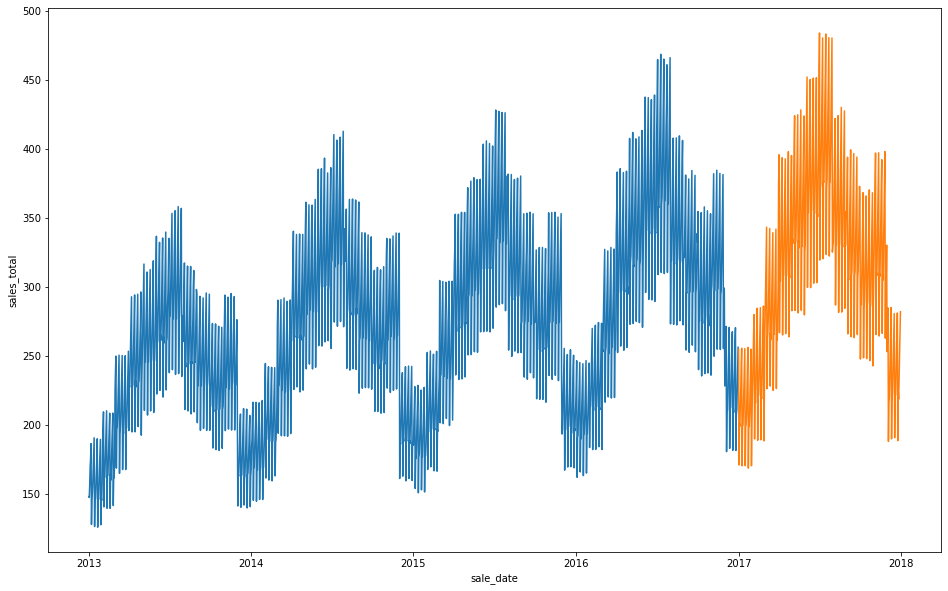

In [6]:
sns.lineplot(data = train, x = 'sale_date', y = 'sales_total')
sns.lineplot(data = test, x = 'sale_date', y = 'sales_total')
plt.show()

Only use your train data set to perform the following tasks:

3. Resample your data and visualize it.

In [7]:
train_weekly_totals = train.resample('w').sum()
test_weekly_totals = test.resample('w').sum()

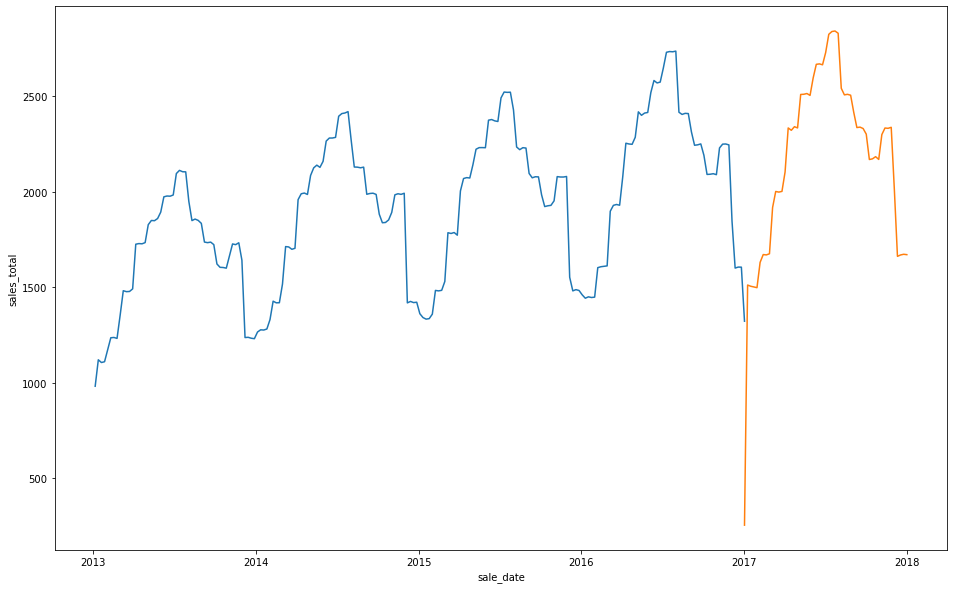

In [8]:
sns.lineplot(data = train_weekly_totals, x = 'sale_date', y = 'sales_total')
sns.lineplot(data = test_weekly_totals, x = 'sale_date', y = 'sales_total')
plt.show()

In [9]:
#There is a problem with the test set here; this has to do with the year starting midway through a week. I'd have to 
# manually set the train/test split date to fix this.
test_weekly_totals.head()

,item_price,sale_amount,sale_id,sales_total
sale_date,,,,
2017-01-01 00:00:00+00:00,5.1604,47.418,457049.0,254.52542
2017-01-08 00:00:00+00:00,36.1228,280.224,3199371.0,1511.10074
2017-01-15 00:00:00+00:00,36.1228,279.802,3199420.0,1504.74772
2017-01-22 00:00:00+00:00,36.1228,279.828,3199469.0,1501.13188
2017-01-29 00:00:00+00:00,36.1228,278.690,3199518.0,1497.33960


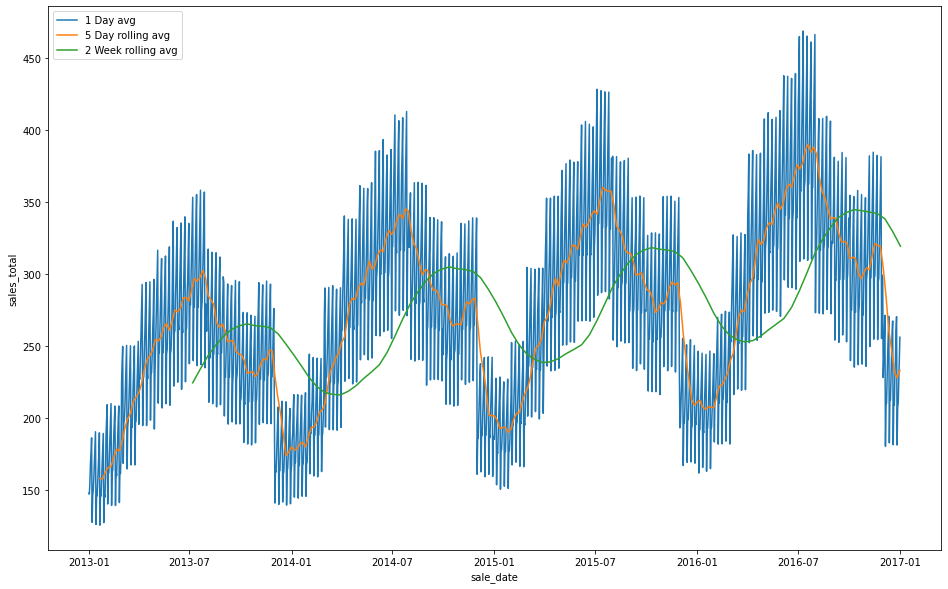

In [10]:
# 4. Creating a rolling (moving) average of your data and visualize it.
sns.lineplot(data = train.resample('D').mean().rolling(1).mean(), x = 'sale_date', y = 'sales_total', label = "1 Day avg")
sns.lineplot(data = train.resample('5D').mean().rolling(5).mean(), x = 'sale_date', y = 'sales_total', label = '5 Day rolling avg')
sns.lineplot(data = train.resample('2w').mean().rolling(14).mean(), x = 'sale_date', y = 'sales_total', label = '2 Week rolling avg')

plt.legend()


Text(0.5, 1.0, 'Daily Difference in Total Sales')

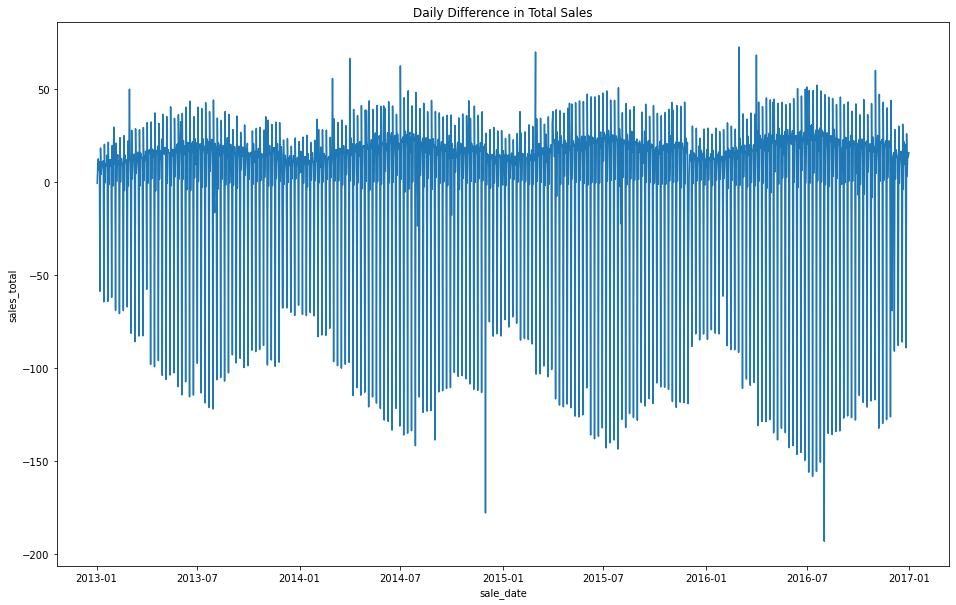

In [11]:
# 5. Plot the difference in sales from one day to the next.
sns.lineplot(data= train.diff(), x = 'sale_date', y = 'sales_total')
plt.title('Daily Difference in Total Sales')

Text(0.5, 1.0, 'Daily % Difference in Total Sales')

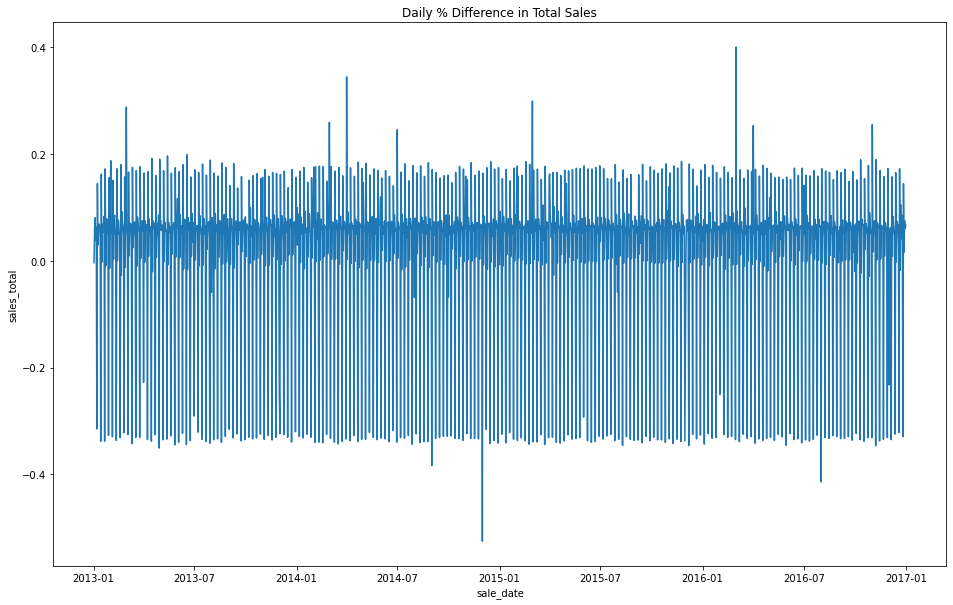

In [12]:
# 6. Plot the % difference in sales from one day to the next.

sns.lineplot(data= train.diff() / train.shift(), x = 'sale_date', y = 'sales_total')
plt.title('Daily % Difference in Total Sales')

Text(0.5, 1.0, 'Weekly % Difference in Total Sales')

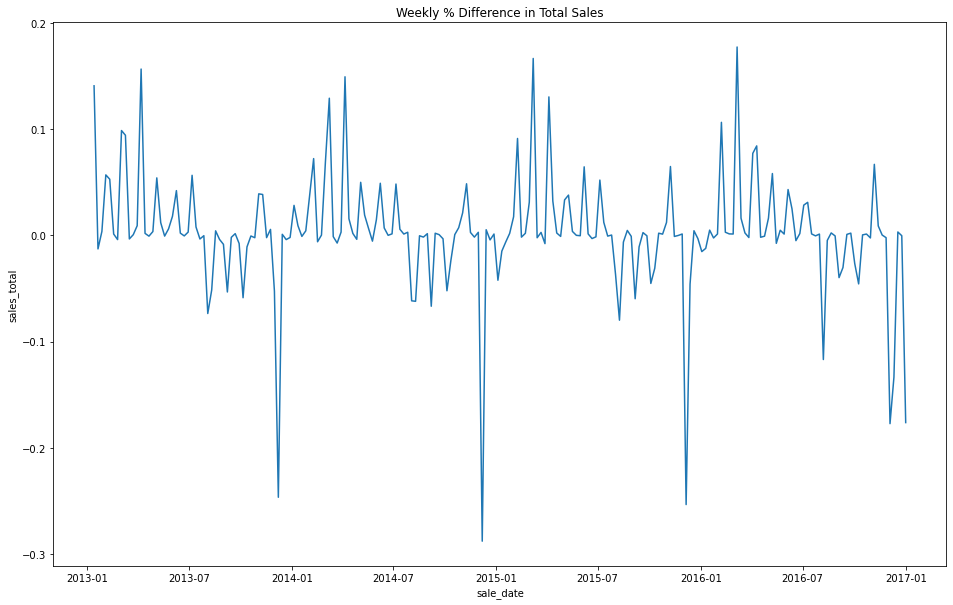

In [13]:
# 7. Plot the % difference in sales from one week to the next.
weekly = train.resample('w').sum()
sns.lineplot(data= weekly.diff() / weekly.shift(), x = 'sale_date', y = 'sales_total')
plt.title('Weekly % Difference in Total Sales')

Text(0.5, 1.0, 'Monthly % Difference in Total Sales')

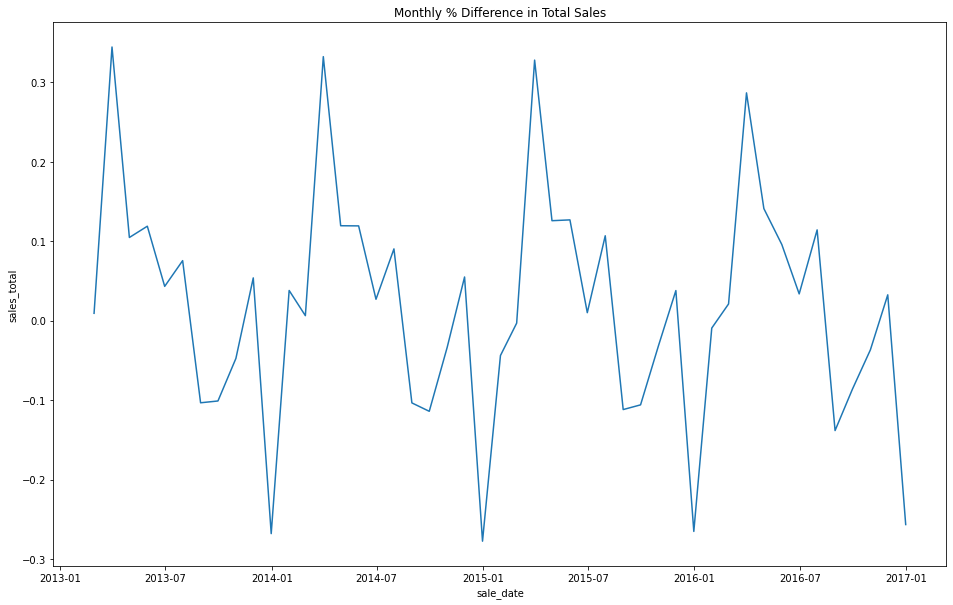

In [14]:
# 8. Plot the % difference in sales from one month to the next.

monthly = train.resample('M').sum()
sns.lineplot(data= monthly.diff() / monthly.shift(), x = 'sale_date', y = 'sales_total')
plt.title('Monthly % Difference in Total Sales')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

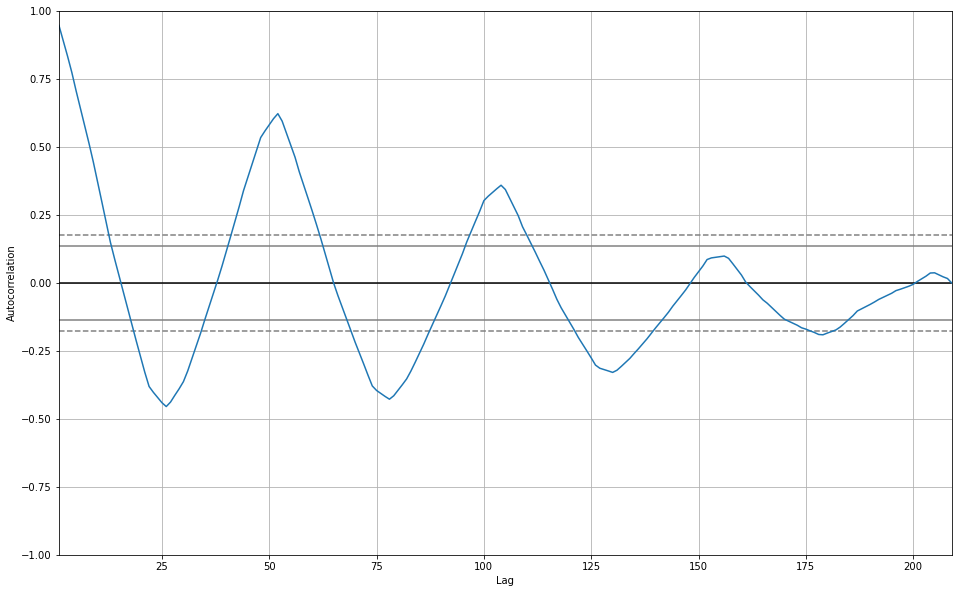

In [15]:
# 9. Visualize an autocorrelation plot on a weekly resampling.

pd.plotting.autocorrelation_plot(weekly.sales_total)


In [16]:
# 10. Visualize a seasonal decomposition plot on a weekly resampling.

result = sm.tsa.seasonal_decompose(weekly.sales_total)

# Make a dataframe:

decomposition = pd.DataFrame({
    'weekly_totals': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,weekly_totals,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,981.53500,NaN,-542.061272,NaN
2013-01-13 00:00:00+00:00,1119.86842,NaN,-554.598048,NaN
2013-01-20 00:00:00+00:00,1105.62704,NaN,-559.347731,NaN
2013-01-27 00:00:00+00:00,1109.81768,NaN,-561.833245,NaN
2013-02-03 00:00:00+00:00,1173.09510,NaN,-541.486591,NaN


<AxesSubplot:xlabel='sale_date'>

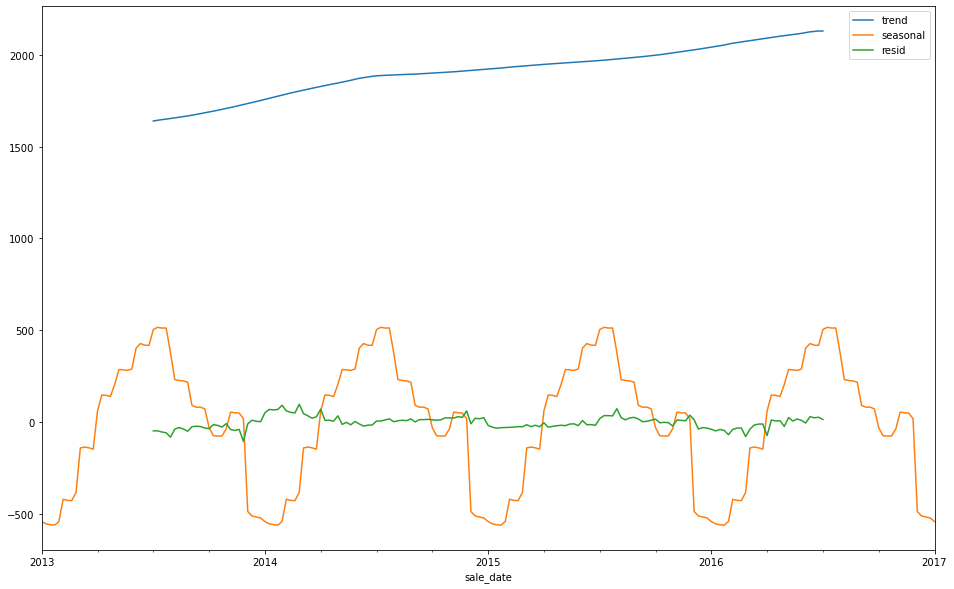

In [17]:
decomposition.iloc[:, 1:].plot()

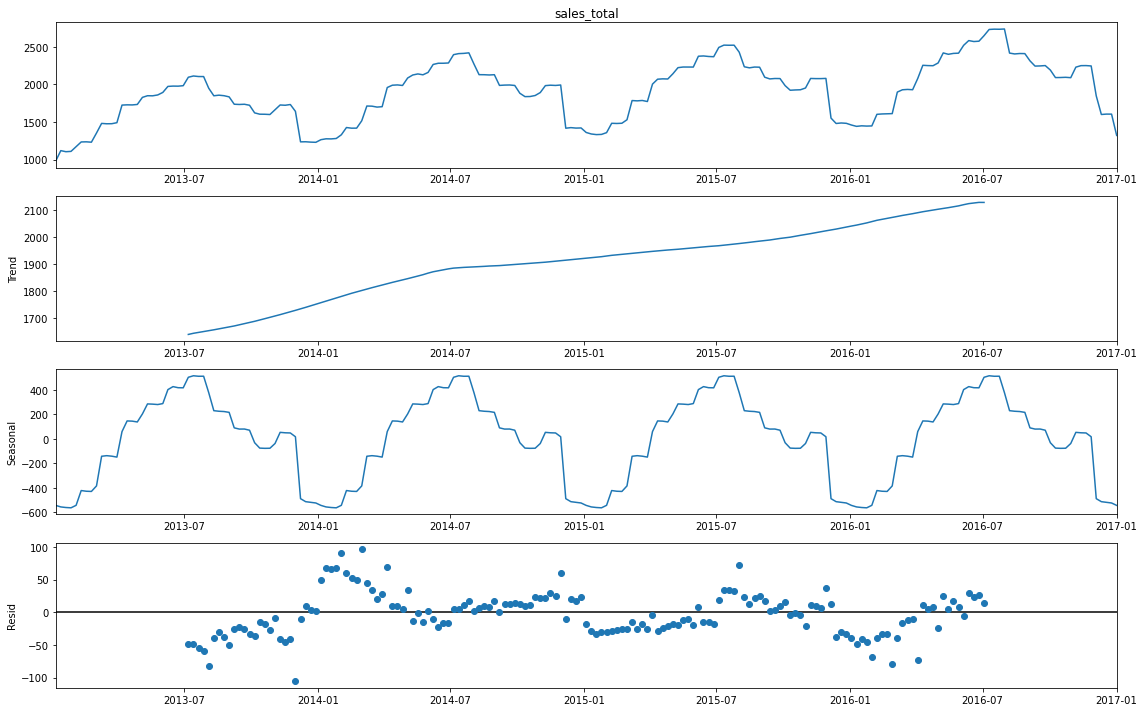

In [18]:
result.plot()
None

### OPS data
Load your OPS data using your acquire and/or prepare functions.

1. Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test.

In [19]:
df = acquire.get_power_systems()
df = prepare.pow_sys_index(df)
df = prepare.pow_sys_fill_vals(df)
df.head(2)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0


In [20]:
train = df[:'2013']
test = df['2014':]

Only use the train data set to perform the following tasks:

2. Visualize your train-test split.


<AxesSubplot:xlabel='Date'>

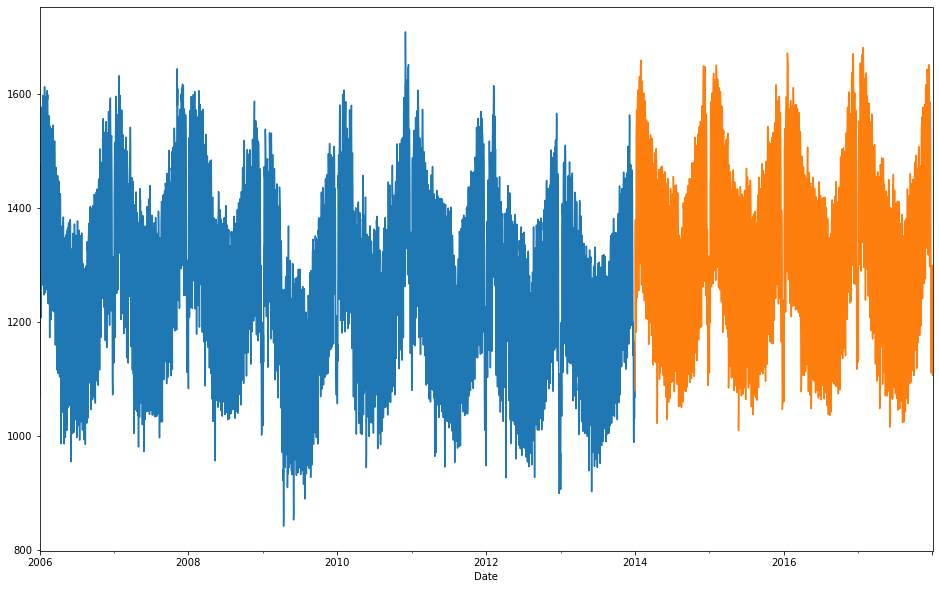

In [21]:
# sns.lineplot(data = train, x = 'sale_date', y = 'sales_total')
# sns.lineplot(data = test, x = 'sale_date', y = 'sales_total')
# plt.show()

train.Consumption.plot()
test.Consumption.plot()

3. Plot the consumption, wind, and solar data on the same chart.


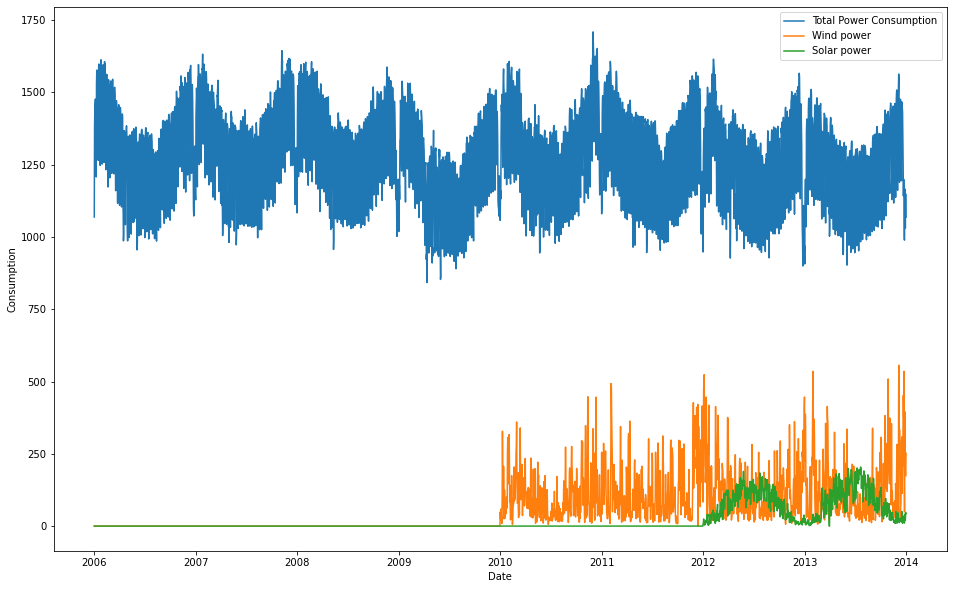

In [22]:
sns.lineplot(data= train, x='Date', y = 'Consumption', label = 'Total Power Consumption')
sns.lineplot(data= train, x='Date', y = 'Wind', label = 'Wind power')
sns.lineplot(data= train, x='Date', y = 'Solar', label = 'Solar power')
plt.show()

4. Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.


<AxesSubplot:xlabel='Date'>

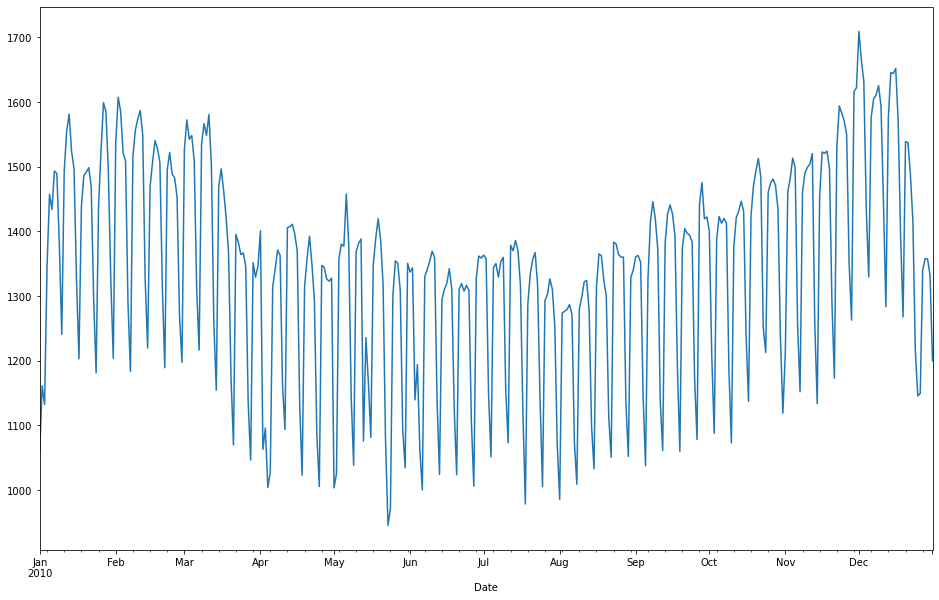

In [23]:
train.Consumption['2010'].plot()

Patterns in Power Consumption noted:
- Power usage dips in the summer months and spikes in the winter months
- It looks like power peaks and dips majorly each week, by visual observation here it's difficult to determine which days it's on.

5. Resample the consumption data to monthly and plot it.


<AxesSubplot:xlabel='Date'>

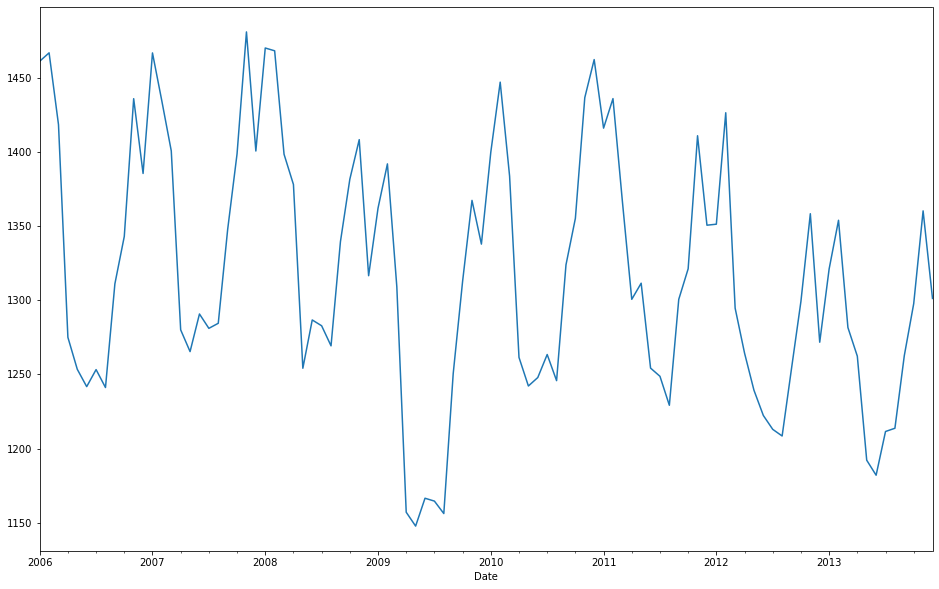

In [24]:
train.resample('m').mean().Consumption.plot()

6. Resample the consumption data to yearly and plot it.

<AxesSubplot:xlabel='Date'>

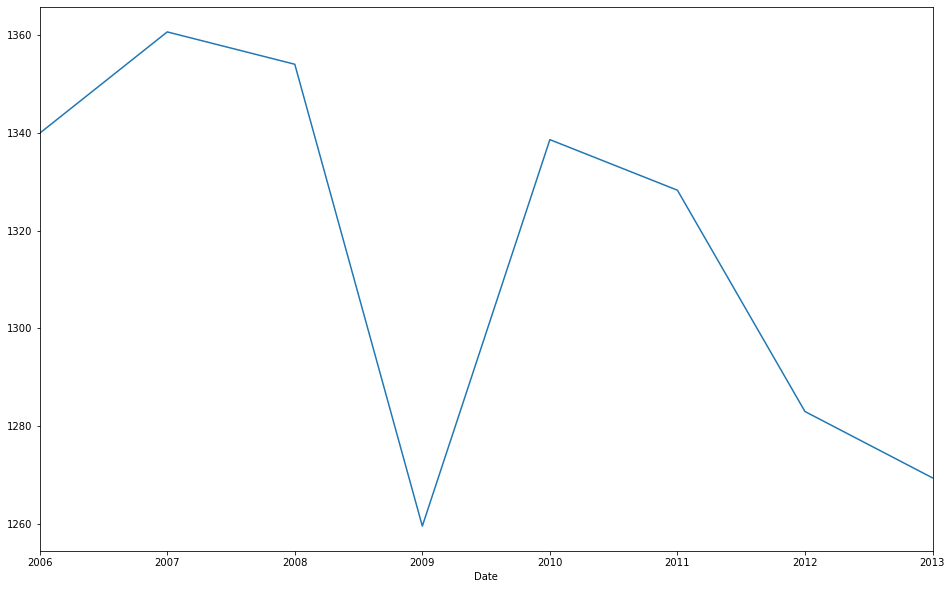

In [25]:
train.resample('Y').mean().Consumption.plot()

### BONUS:
7. Group the consumption data by month and create a boxplot treating the month component as a separate categorical feature.


In [42]:
train['month'] = train.index.strftime('%m %b')

In [43]:
train.head()

,Consumption,Wind,Solar,Wind+Solar,month
Date,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01 Jan
2006-01-02,1380.521,0.0,0.0,0.0,01 Jan
2006-01-03,1442.533,0.0,0.0,0.0,01 Jan
2006-01-04,1457.217,0.0,0.0,0.0,01 Jan
2006-01-05,1477.131,0.0,0.0,0.0,01 Jan


<AxesSubplot:xlabel='month', ylabel='Consumption'>

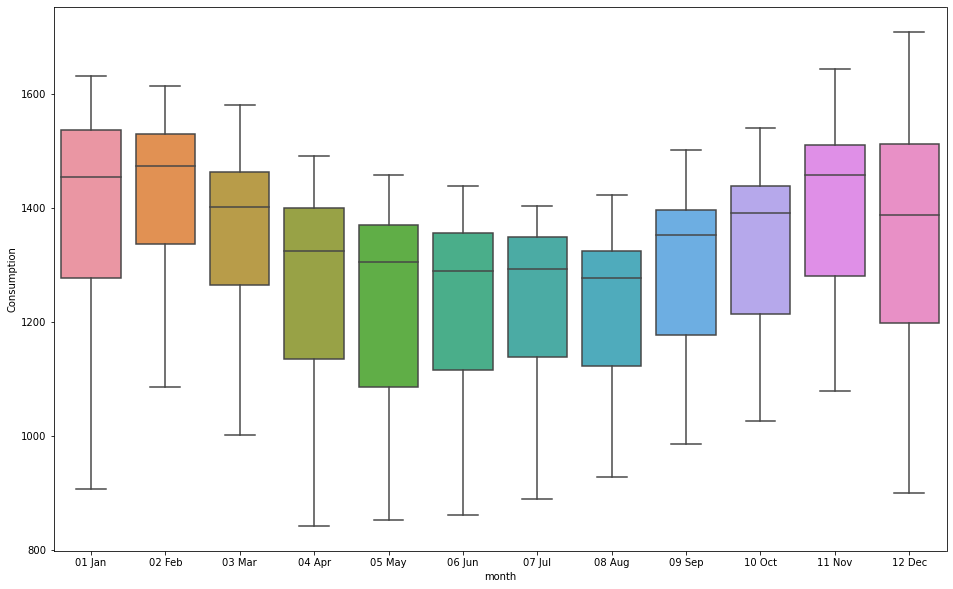

In [48]:
sns.boxplot(data = train, y = 'Consumption', x = 'month')

8. Group the consumption data by weekday and create a boxplot treating the weekday component as a separate categorical feature.


In [54]:
train['weekday'] = train.index.day_name()

<AxesSubplot:xlabel='weekday', ylabel='Consumption'>

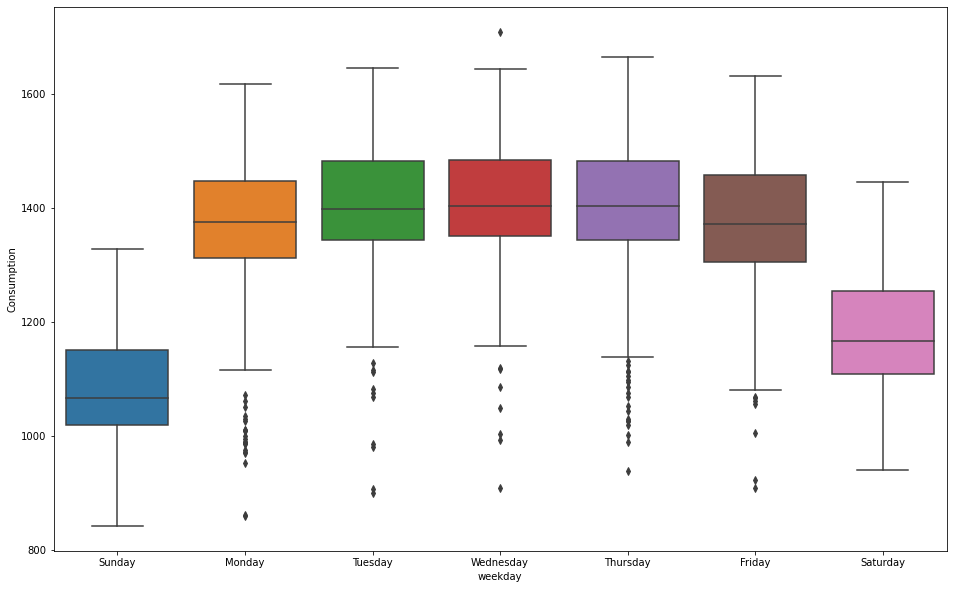

In [56]:
sns.boxplot(data = train, x='weekday', y='Consumption')

9. Create a subseasonal plot by month of your consumption data.


In [64]:
table = train.groupby([train.index.year, train.index.month]).Consumption.mean().unstack()
table

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645


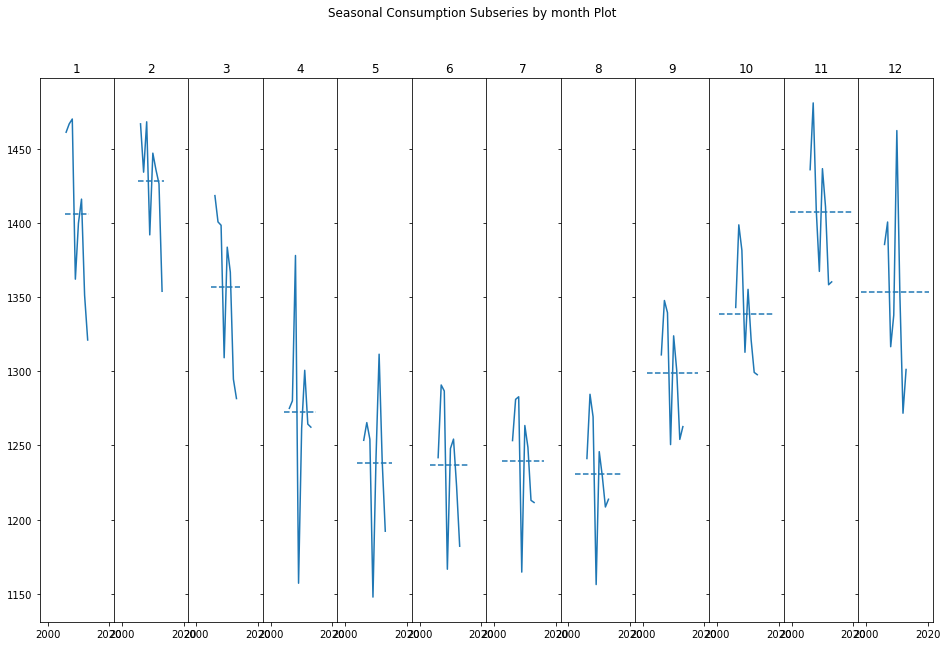

In [66]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Consumption Subseries by month Plot')
fig.subplots_adjust(wspace=0)

10. Create one or two visualizations that helps answer the follow questions: How does wind production/consumption vary within a year? How does wind production/consumption vary from year to year?


<AxesSubplot:xlabel='Date'>

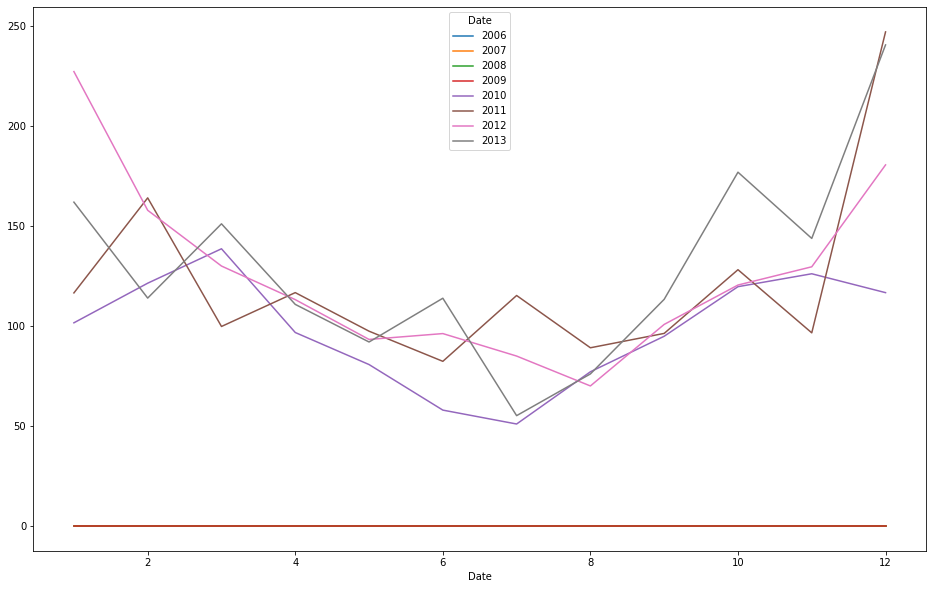

In [72]:
train.groupby([train.index.year, train.index.month]).Wind.mean().unstack(0).plot()

11. Create one or two visualizations that helps answer the follow questions: How does solar production/consumption vary within a year? How does solar production/consumption vary from year to year?


<AxesSubplot:xlabel='Date'>

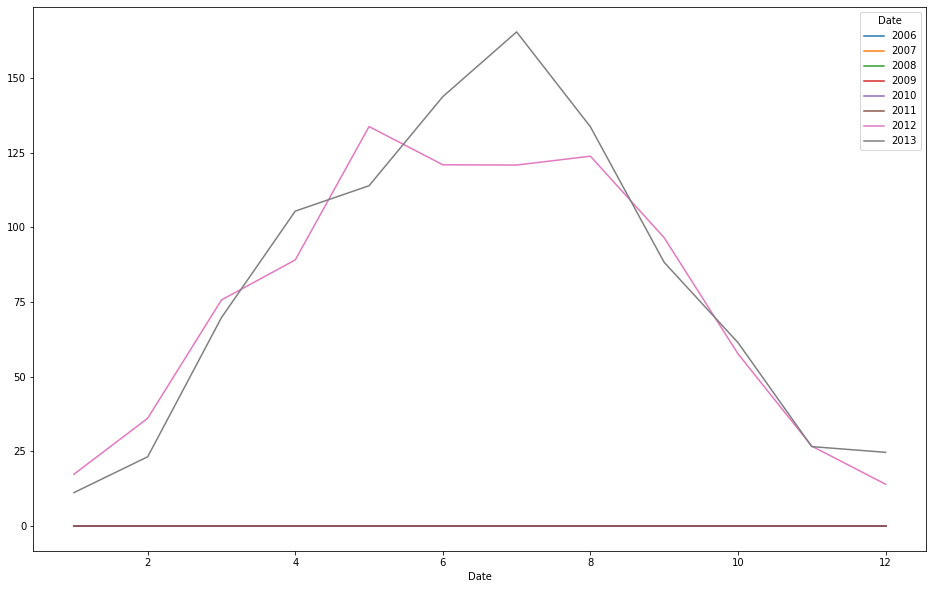

In [73]:
train.groupby([train.index.year, train.index.month]).Solar.mean().unstack(0).plot()

12. Plot a time series decomposition for your consumption data and note your takeaways.


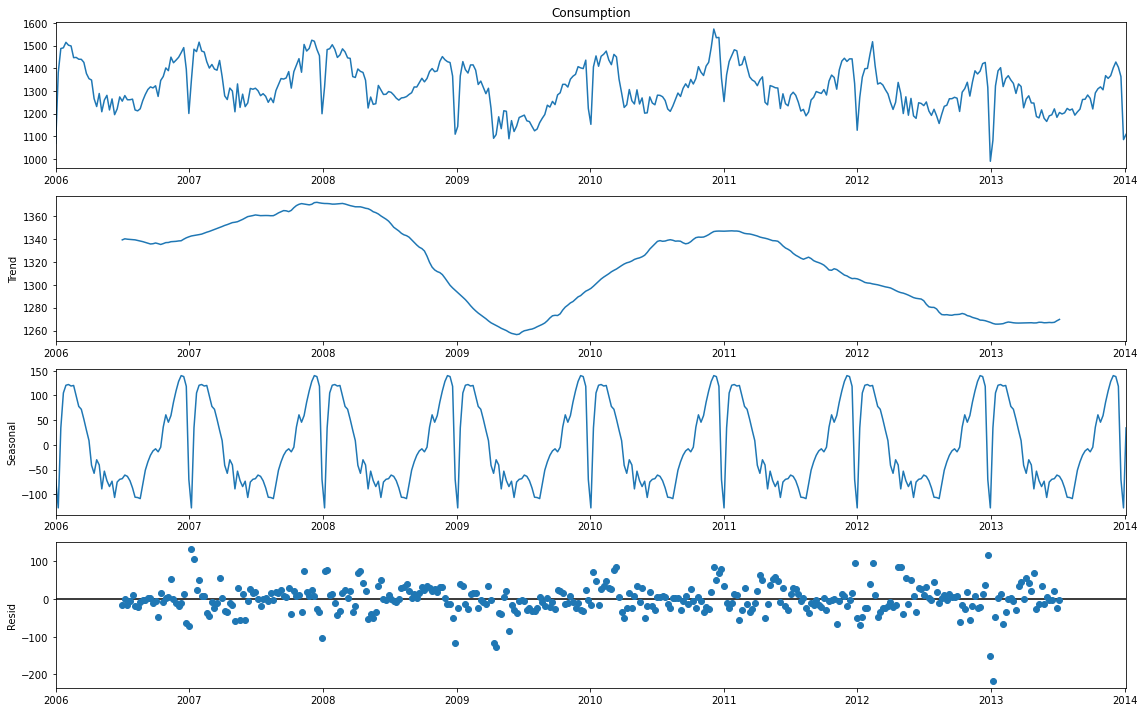

In [78]:
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)

result.plot()
None

13. Create an autocorrelation plot of a weekly resampling of the consumption data.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

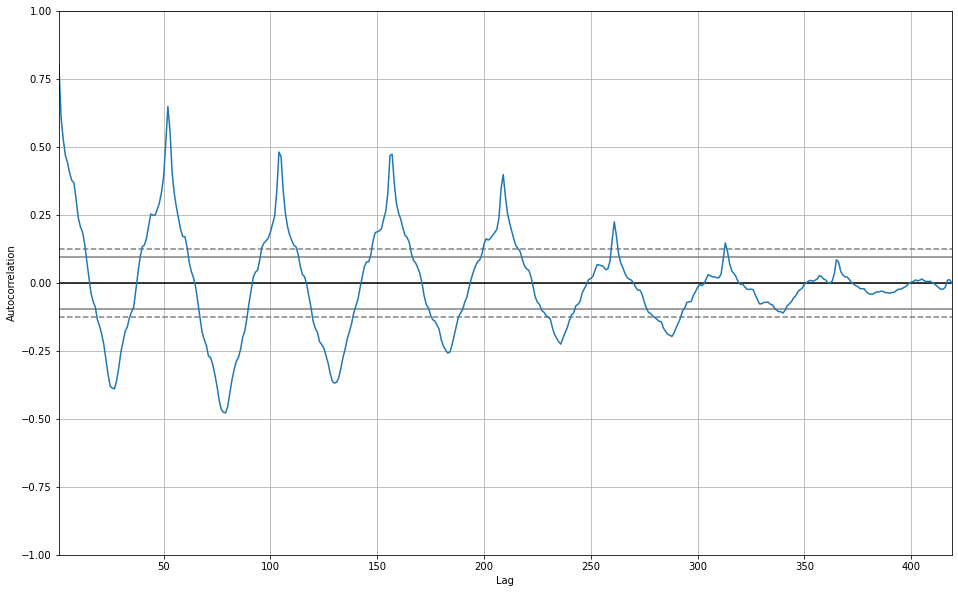

In [79]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())